<h1 align="center">Machine Learning</h1><h2 align="center" style="margin:10px">Assignment</h2>

In [3]:
# Import all necessary libraries here
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet
from sklearn import (decomposition, preprocessing)
import seaborn as sns
from datetime import datetime

# Exercise 1: Regression

For this exercise we will be using the famous nycflights13 data which contains the `airlines`, `airports`, `flights`, `planes`, and `weather` datasets. Please see the documentation (`nycflights13.pdf`) for further information.

#### a) Load all files as pandas dataframes and display the first 5 rows of each dataset.

In [4]:
airlines_df = pd.read_csv('airlines.csv')
airports_df = pd.read_csv('airports.csv')
flights_df = pd.read_csv('flights.csv')
planes_df = pd.read_csv('planes.csv')
weather_df = pd.read_csv('weather.csv')

In [5]:
airlines_df.head()

,carrier,name
0,9E,Endeavor Air Inc.
1,AA,American Airlines Inc.
2,AS,Alaska Airlines Inc.
3,B6,JetBlue Airways
4,DL,Delta Air Lines Inc.


In [6]:
airports_df.head()

,faa,name,lat,lon,alt,tz,dst,tzone
0,04G,Lansdowne Airport,41.130472,-80.619583,1044,-5.0,A,America/New_York
1,06A,Moton Field Municipal Airport,32.460572,-85.680028,264,-6.0,A,America/Chicago
2,06C,Schaumburg Regional,41.989341,-88.101243,801,-6.0,A,America/Chicago
3,06N,Randall Airport,41.431912,-74.391561,523,-5.0,A,America/New_York
4,09J,Jekyll Island Airport,31.074472,-81.427778,11,-5.0,A,America/New_York


In [7]:
flights_df.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
4,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0


In [8]:
planes_df.head()

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan
1,N102UW,1998.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
2,N103US,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
3,N104UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
4,N10575,2002.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NaN,Turbo-fan


In [9]:
weather_df.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0,2013-01-01T00:00:00Z
1,EWR,2013,1,1,1,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0,2013-01-01T01:00:00Z
2,EWR,2013,1,1,2,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0,2013-01-01T02:00:00Z
3,EWR,2013,1,1,3,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0,2013-01-01T03:00:00Z
4,EWR,2013,1,1,4,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0,2013-01-01T04:00:00Z


#### b) Convert all temperature attributes to degree Celsius. We will be using this in what follows.

In [10]:
def convert_to_celsius(fahrenheit):
    return (fahrenheit - 32) * (5/9)

weather_df.temp = weather_df.temp.apply(convert_to_celsius)
weather_df.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,2.8,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0,2013-01-01T00:00:00Z
1,EWR,2013,1,1,1,2.8,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0,2013-01-01T01:00:00Z
2,EWR,2013,1,1,2,3.3,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0,2013-01-01T02:00:00Z
3,EWR,2013,1,1,3,3.3,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0,2013-01-01T03:00:00Z
4,EWR,2013,1,1,4,3.3,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0,2013-01-01T04:00:00Z


#### c) Using OLS, investigate if flight distance is associated with arrival delay. You should be cautious regarding negative delays.

**Preprocessing**

In order to get the `flights_df` dataset ready for modeling, we did a exploratory analysis to understand the flights dataset where we came to the following conclussions:
- **Negative delays**: Only flights arriving or departing behind schedule (those with positive delays), are to be considered delays. Flights arriving or departing ahead of schedule (those with negative delays), will not be considered delays since they are actually early arrivals or departures and they aren’t exactly delays in the true meaning of the word. Thus, all negative delays will be set to 0.
- **NaN-values**: Due to the size of the flights dataset, we have enough samples to train our data. Thus, we will ignore all row containing NaN-values.
- **Outliers**: Outliers should be factored in, since manual errors are very unlikely to happen when registering flight and we assume that the flights data is automatically generated by a problem. Support for this decision is shown in section (d).

In [11]:
# removing NaN rows
flights_df = flights_df.dropna()

# setting negative arrival and departure delays to 0 (if they are negative then they are not delays)
flights_df.loc[(flights_df.dep_delay < 0), "dep_delay"] = 0
flights_df.loc[(flights_df.arr_delay < 0), "arr_delay"] = 0

Once data preprocessing has been done, we pair plot the `distance` and `arr_delay` features to study if these features are correlated

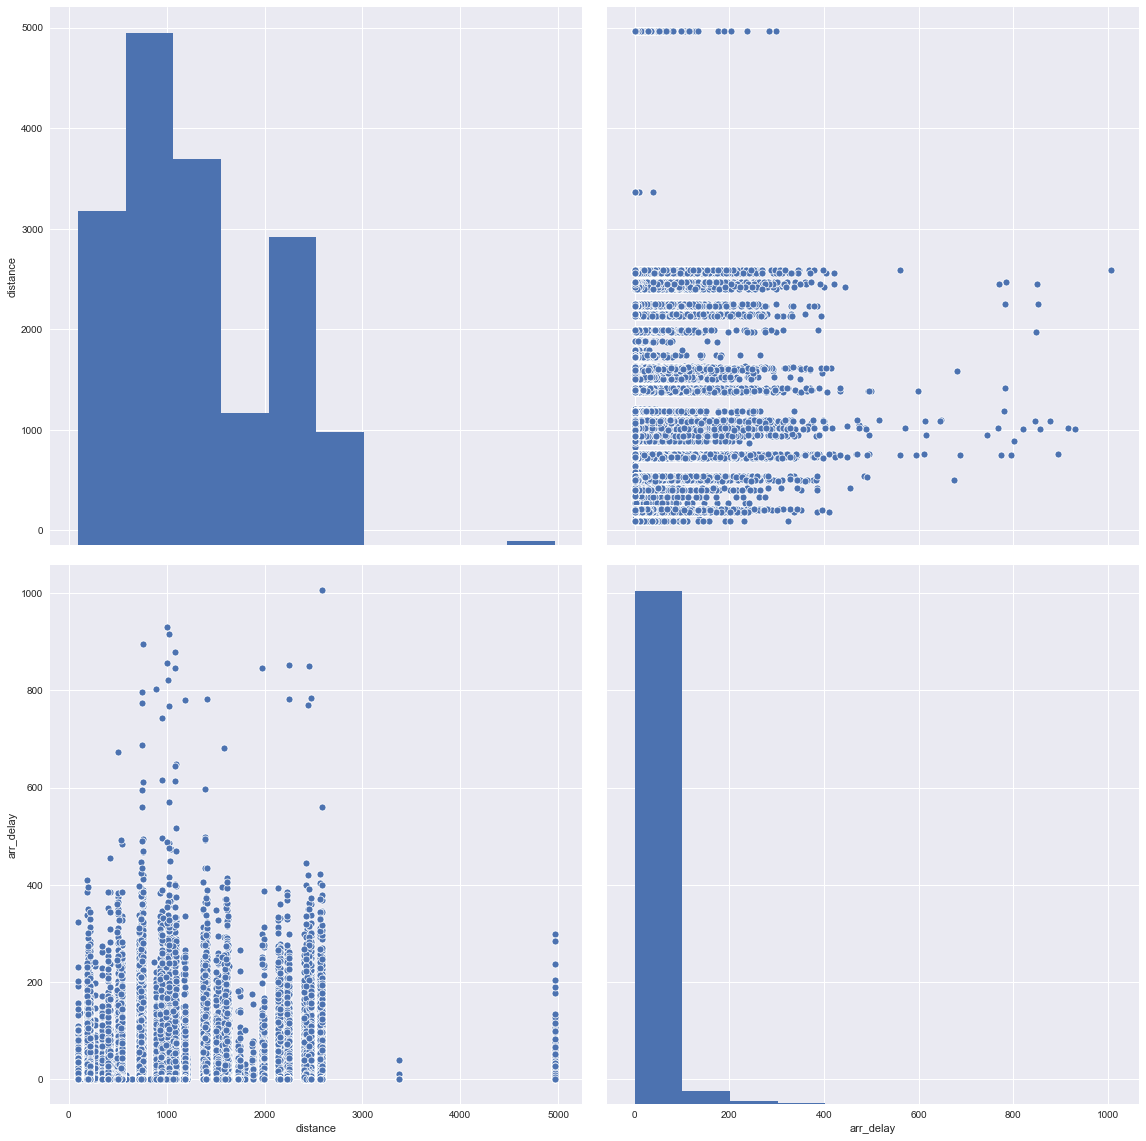

('Correlation:', 0.007303776442458605)

In [12]:
# pair plotting the distance and arr_delay features
plt.style.use('seaborn')
cols = ['distance','arr_delay']
sns.pairplot(flights_df[cols], height=8)
plt.show()

# Calculate the Pearson correlation coefficient to measure the linear relationship between distance and arr_delay
"Correlation:", flights_df['distance'].corr(flights_df['arr_delay'])

We observe that the obtained correlation is very low. It seems like there is no relationship between the distance and the arrival delay.

To be sure, we can use a heatmap to visualize the relationship between the `distance` and the `arr_delay`.

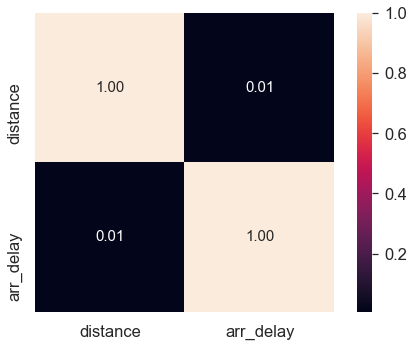

In [13]:
cmap  = np.corrcoef(flights_df[cols].values.T)
sns.set(font_scale=1.5)
heat_map = sns.heatmap(cmap, cbar=True, annot=True, square=True, fmt='.2f', 
                       annot_kws={'size':15}, yticklabels=cols, xticklabels=cols)
plt.show()

Based the two pairplots shown above, we can see that there is no relationship between the two variables. However, **Linear Regression** (**Ordinary Least Squares**) can be used to affirm this assumption and check if it is true that the distance cannot be predicted based on arrival delay.

In [14]:
X = flights_df[['arr_delay']]
y = flights_df['distance']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

print ("Slope (a): {:2f}".format(lr.coef_[0]))
print ("Offset (b): {:2f}".format(lr.intercept_))
print ("Training score: {:2f}".format(lr.score(X_train, y_train)))
print ("Test score: {:2f}".format(lr.score(X_test,y_test)))

Slope (a): 0.190171
Offset (b): 1285.643036
Training score: 0.000080
Test score: -0.000087


We get the following formula explaing the relation between the `distance`and the `arr_delay` features:

`distance = 1285.64 + 0.19x`

The linear regression scores imply that the model cannot be used to predict the distance based on the arrival delay, as the heatmap already indicated.

Now we will try to remove the outliers, to compare the OLS performance

#### d) Using OLS, investigate if departure delay is associated with arrical delay. Again, consider what to do with negative delays.

Preprocessing was already done for section (c), but just to recap,  we set the negative delays to 0 and the rows containing NaN values were removed.

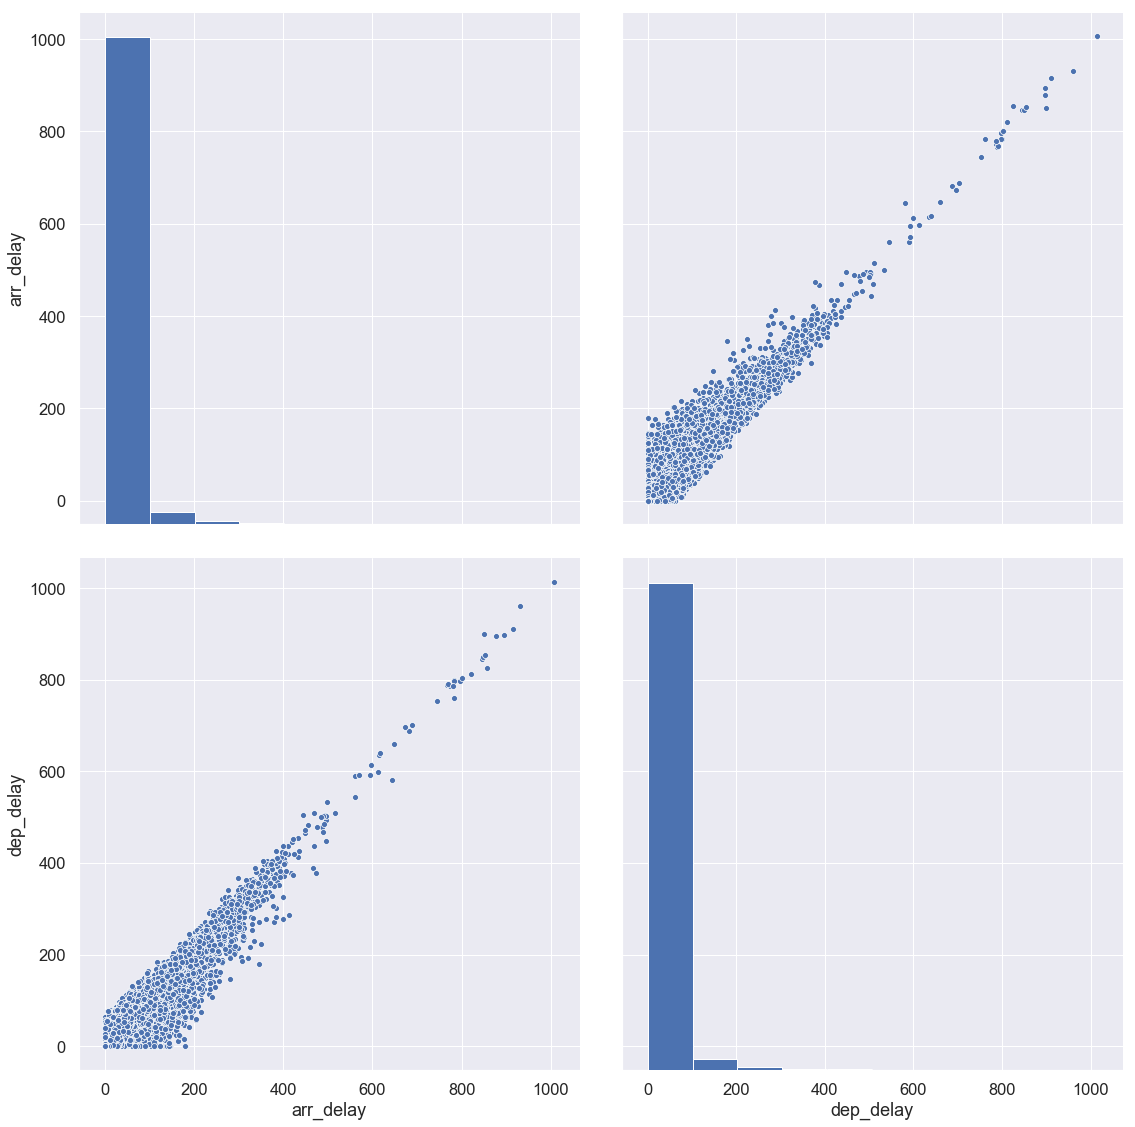

('Correlation:', 0.9313370762663576)

In [15]:
# pair plotting the dep_delay and arr_delay features
cols = ['arr_delay','dep_delay']
sns.pairplot(flights_df[cols], height=8)
plt.show()

# Calculate the Pearson correlation coefficient to measure the linear relationship between dep_delay and arr_delay
"Correlation:", flights_df['dep_delay'].corr(flights_df['arr_delay'])

The correlation between departure delay and arrival delay is fairly high, which implies that there is a relationship between the two features. We will use OLS to verify this relation.

In [16]:
X = flights_df[['arr_delay']]
y = flights_df['dep_delay']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train,y_train)
print ("slope (a): {:2f}".format(lr.coef_[0]))
print ("offset (b): {:2f}".format(lr.intercept_))
print ("Training score: {:2f}".format(lr.score(X_train, y_train)))
print ("Test score: {:2f}".format(lr.score(X_test, y_test)))

slope (a): 0.919672
offset (b): 0.097123
Training score: 0.867898
Test score: 0.865759


We get the following formula explaing the relation between the `dep_delay`and the `arr_delay` features:

`distance = 0.09 + 0.91x`

Unlike in secion (c), in this case there is a relation between the arrival and the departure delay and due to the high linear regression scores,  the model can be used to predict the arrival delay based on the departure delay, as it can be seen in the above pairplot.

**Including outliers as a test in OLS performance**

Now we will try to remove the outliers, to compare the OLS performance and argument the decision of factoring in the outliers in the flights dataset.

In [17]:
# we remove the outliers with z-score higher than 3 to prove that the OLS performance is worse.
flightsZ = flights_df.drop(flights_df[np.abs(stats.zscore(flights_df.distance)) > 3].index) 
flightsZ = flightsZ.drop(flightsZ[np.abs(stats.zscore(flightsZ.arr_delay)) > 3].index) 

In [18]:
# trying with data excluding the outliers
X = flightsZ[['dep_delay']]
y = flightsZ['arr_delay']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train,y_train)

print ("OLS Training score without outliers: {:2f}".format(lr.score(X_train,y_train)))
print ("OLS Test score without outliers: {:2f}".format(lr.score(X_test,y_test)))

OLS Training score without outliers: 0.660259
OLS Test score without outliers: 0.663686


As we can see the OLS performance is affected by the removal of the outliers. For that reason, the *outliers* have been included in the flights datset.

#### e) Investigate whether departure delay is associated with weather conditions at the origin airport. 
#### This includes descriptives, plotting, regression modelling, considering missing values etc. For regression, do OLS, Ridge, Lasso, and Elastic Net. The analysis should also include seasonality trends as a "weather condition". You could, for instance, plot the daily departure delay with the date (or monthly). What are the three most important weather conditions when trying to predict departure delays?

In [19]:
# joining weather and flights dataframes
flights_weather_df = pd.merge(flights_df, weather_df, 
                              on=['origin', 'year', 'month', 'day', 'hour']).drop(['minute'], axis=1).dropna()

We can start by plotting the heatmap to see if any of the weather features are related to the department delay.

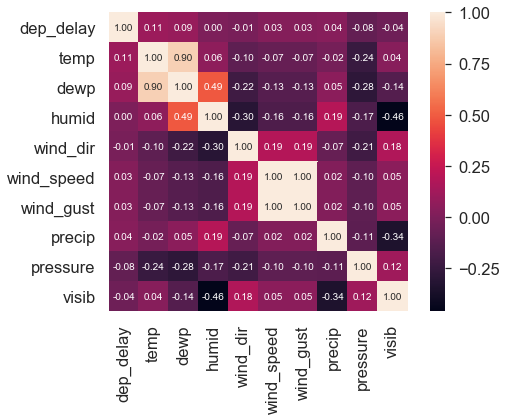

In [20]:
weather_features = ['dep_delay', 'temp', 'dewp', 'humid', 'wind_dir', 'wind_speed', 'wind_gust', 'precip', 'pressure', 'visib']
cmap = np.corrcoef(flights_weather_df[weather_features].values.T)
sns.set(font_scale=1.5)
heatmap = sns.heatmap (cmap, cbar=True, annot=True, square=True, fmt='.2f', 
                       annot_kws={'size':10}, yticklabels=weather_features, xticklabels=weather_features)
plt.show()

The heatmap shows that the `temp` and `dewp` features have (a small) relationship with the departure delay.

Lets take a closer look at thes by pair plotting these features against the `dep_delay`.

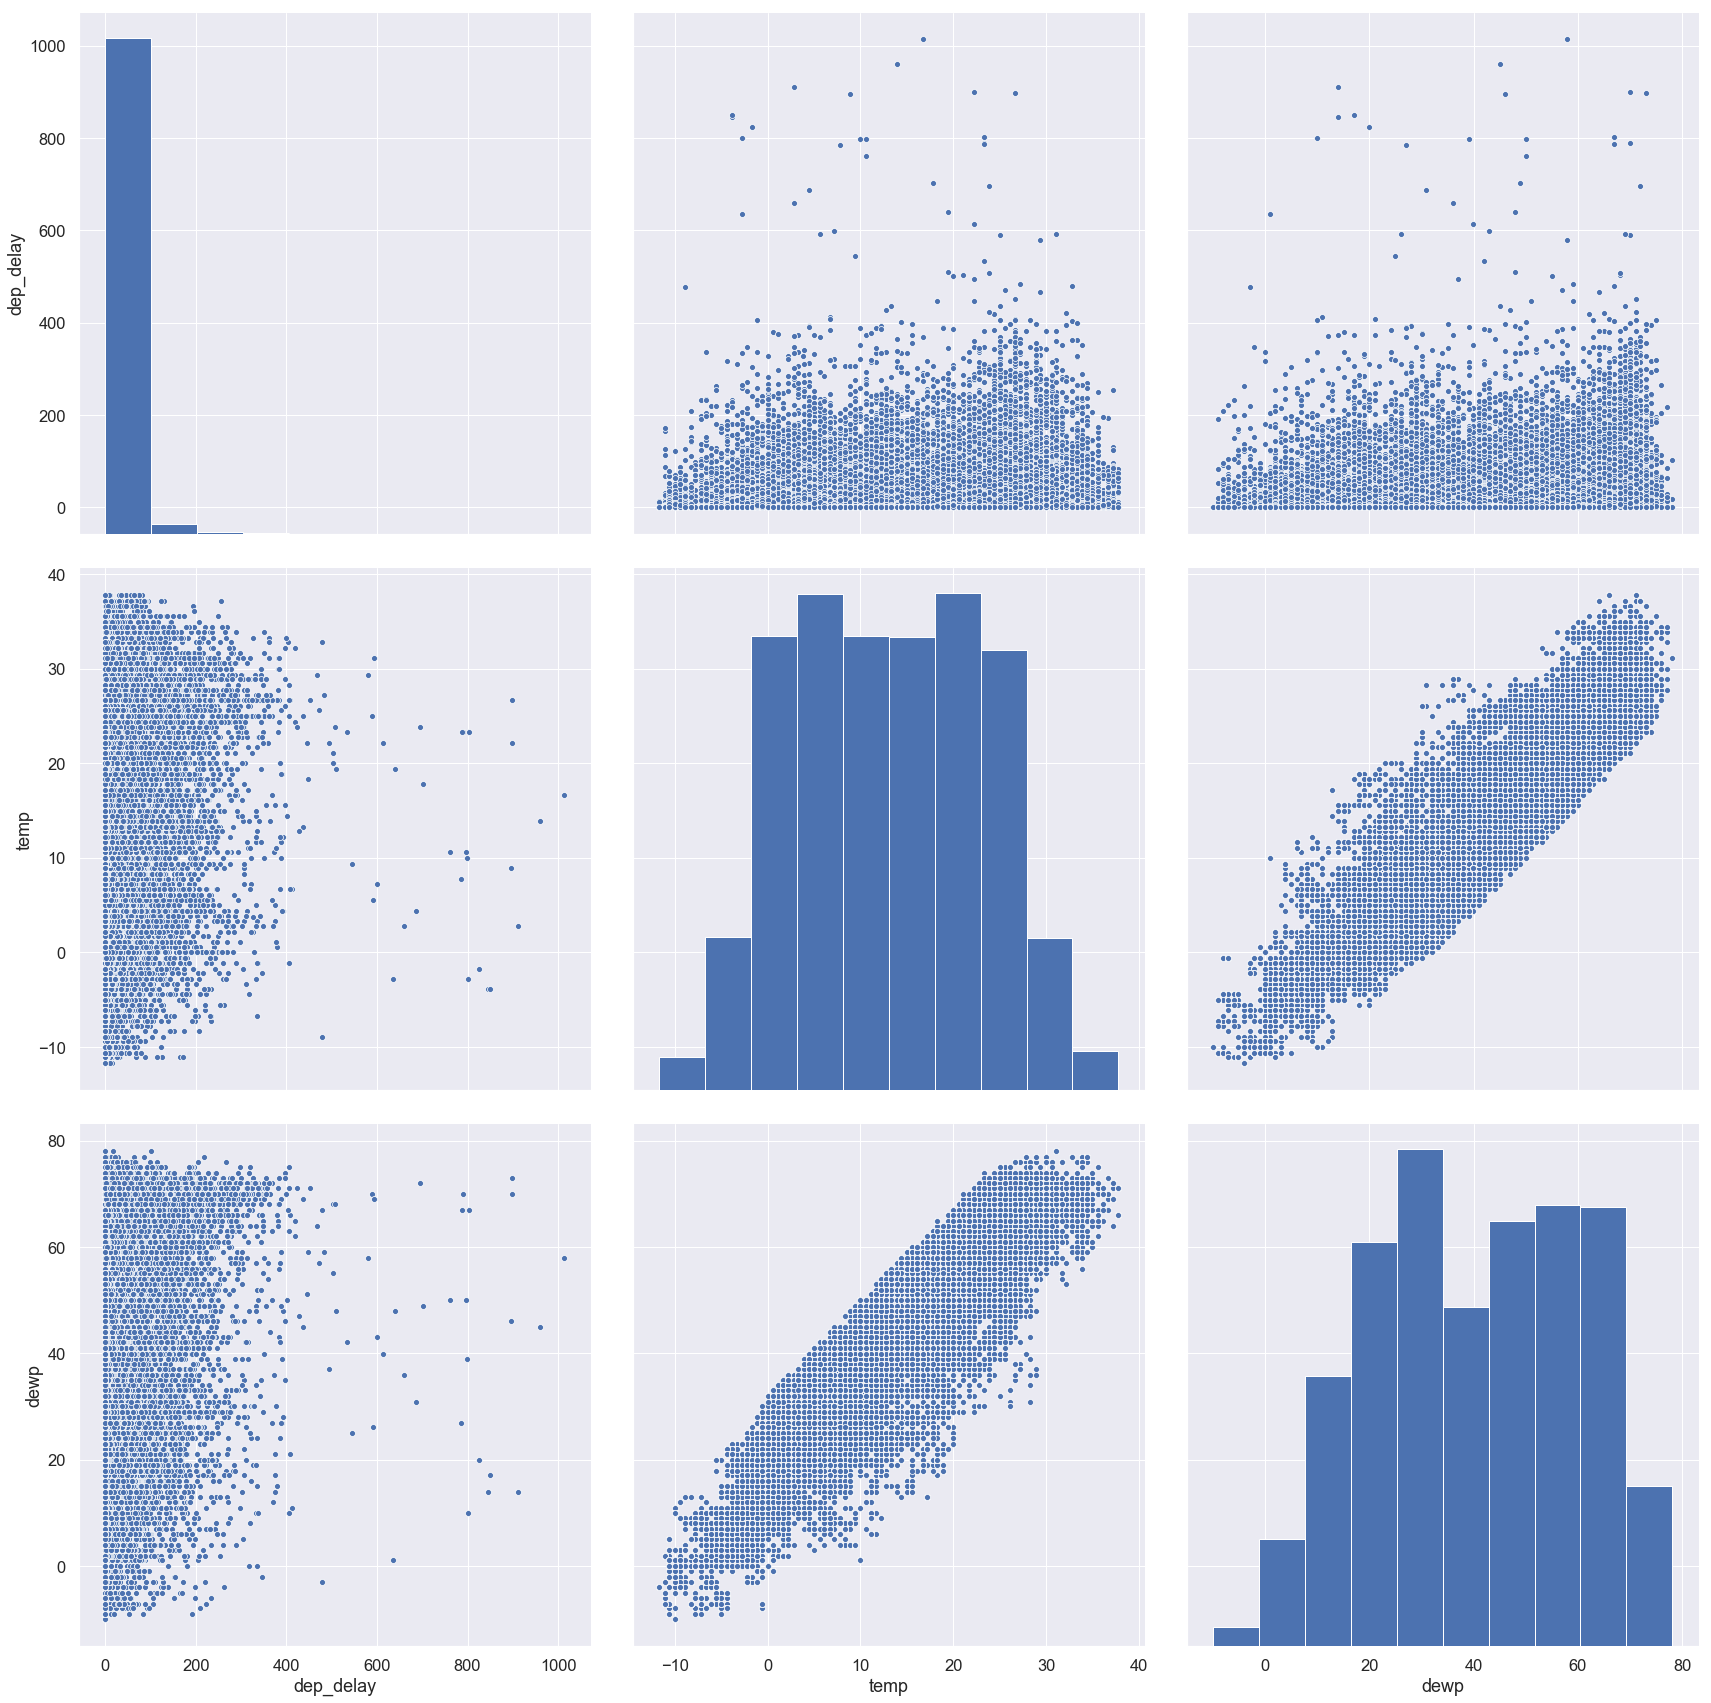

In [21]:
# plotting feature relationships between 'dep_delay','temp','dewp'
cols = ['dep_delay', 'temp', 'dewp']
sns.pairplot(flights_weather_df[cols], height=8)
plt.show()

From the above plot we observe that the temp and dewp are correlated as expected.

Now we will perform regression modeling to study the relation between the departure delay and the most corrrelated weather features based on the heatmap indications, which are `temp`and `dewp`.

We will perform an analysis on only these features, so that the other weather conditions that are not related to the departure delay, would not influence in the scores. As we can see in the heatmap some of the weather features are related to each other, which means that if we use all the weather features to train our regression models, we will get a higher score, but our analysis will be affected. 

In [22]:
# considering temp and dep_delay:
# using OLS
X = flights_weather_df[['temp', 'dewp']]
y = flights_weather_df['dep_delay']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

print ("Training score without iterations: {:2f}".format(lr.score(X_train,y_train)))
print ("Test score without iterations: {:2f}".format(lr.score(X_test,y_test)))

Training score without iterations: 0.011514
Test score without iterations: 0.009769


Based on the linear regression scores, we can see that a linear function (polynomial with degree 1) might not sufficient to fit the training samples. This is called **underfitting**. We will try to scale the data and use linear regression with polynomial features to approximate nonlinear functions to see if we can improve these scores.

In [23]:
#Scale the data
scaler = preprocessing.MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
poly = preprocessing.PolynomialFeatures(degree=15, include_bias=False).fit(X)
X_train_scaled_poly = poly.transform(X_train_scaled)
X_test_scaled_poly = poly.transform(X_test_scaled)

lr = LinearRegression().fit(X_train_scaled_poly, y_train)

print ("Training score with iterations: {:2f}".format(lr.score(X_train_scaled_poly, y_train)))
print ("Test score with iterations: {:2f}".format(lr.score(X_test_scaled_poly, y_test)))

Training score with iterations: 0.036193
Test score with iterations: 0.024446


We can see that OLS is still performing very poorly even with a polynomial of degree 15, as expected. Therefore, we will continue using a polynomial with degree 1 for Ridge, Lasso and Elastic Net models.

In [25]:
# ridge (alpha=1.0 (default)
ridge = Ridge().fit(X_train, y_train)

print ("Training score: {:2f}".format(ridge.score(X_train, y_train)))
print ("Test score: {:2f}".format(ridge.score(X_test, y_test)))

Training score: 0.011514
Test score: 0.009769


In [26]:
# ridge (alpha=100.000)
ridge = Ridge(alpha=100*1000).fit(X_train, y_train)

print ("Training score: {:2f}".format(ridge.score(X_train, y_train)))
print ("Test score: {:2f}".format(ridge.score(X_test, y_test)))

Training score: 0.011507
Test score: 0.009850


We observe that even if we set a high value of alpha, and the model is more restricted, the performance doesn't change much. We can see a very small improvement (0.0001) in the generalization of the model that is probably linked to the increase of alpha. Even so, the ridge model perfomance remains poor.

We suspect that this performance might be linked to the size of the data set, since with such a big amount of data, regularization becomes less important and Ridge's performance ended up being the same as the OLS's performance without iterations that we calculated. 

In [27]:
# lasso (alpha=1.0, max_iter=1000 (default))
lasso = Lasso().fit(X_train, y_train)

print ("Training score: {:2f}".format(lasso.score(X_train, y_train)))
print ("Test score: {:2f}".format(lasso.score(X_test, y_test)))

Training score: 0.011415
Test score: 0.010000


We observe the same poor performance using default Lasso. Let's try tweaking the parameters:

In [28]:
alphas = 10**np.linspace(10,-2,100)*0.5 # generate alpha list covering the full range of scenarios from the null model containing only the intercept, to the least squares fit
lasso = Lasso(max_iter = 100000, normalize = True)
coefs = []

for alpha in alphas:
    lasso.set_params(alpha=alpha)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    
lasso.fit(X_train, y_train)
print ("Training score: {:2f}".format(lasso.score(X_train, y_train)))
print ("Test score: {:2f}".format(lasso.score(X_test, y_test)))
print(list(zip(['temp', 'depw'], lasso.coef_)))

Training score: 0.009096
Test score: 0.008215
[('temp', 0.1944256956176836), ('depw', 0.0)]


The performance is still really poor. Let's try Elastic NET

In [29]:
# ElasticNet (alpha=1.000.000, max_iter=10.000)
elastic_net = ElasticNet(alpha=1000*1000, l1_ratio=0.5, max_iter=10000).fit(X_train, y_train)

print ("Training score: {:2f}".format(elastic_net.score(X_train, y_train)))
print ("Test score: {:2f}".format(elastic_net.score(X_test, y_test)))

Training score: 0.000000
Test score: -0.000010


Elastic NET performed as bad as the previous regression models. 

That leads us to think that, in general, what happens during the flight does not affect the delays. Only what happens before the flight might condition these delays. Thus, this might explain the poor performance of the regression models and the weather conditions might not actually be related to the departure delay.

In order to prof if this theory is actually true, let's study if there are any seasonal trends related to the delays.

#### Seasonal patterns

To study if there is a seasonal pattern in departure delays, we will first see what the heatmap suggests and then we will plot it across the year, month and day of all flights.

In [30]:
#Grouping by Year, Month and Day the fligh data to find the mean arr and dep delay for each day of the month in 2013.
flights_grouped_df = flights_df.groupby(['year', 'month', 'day'], as_index=False).mean()

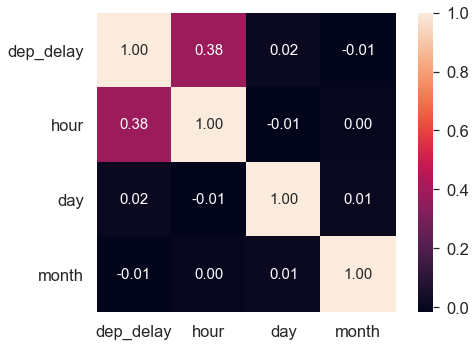

In [31]:
# what does the heatmap suggest:
cols = ['dep_delay', 'hour', 'day', 'month']
cm = np.corrcoef(flights_grouped_df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap (cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':15}, yticklabels=cols,xticklabels=cols)
plt.show()

The heatmap indicates that there is a small relation between the hour and the departure delay and a negative relation between the departure and the month.

Let's try to find if there are any seasonality trends in the departure delay. We suspect that in the **holiday season**, the departure delay might be higher than in any other period of the year. Of course, it's not possible for the heatmap to catch this relation since <u>an increase in the month doesn't neccessarily always mean an increase in the departure delay</u>. 

In June and July there should be an increase in the departure delay, but then as the month increases after the holiday seson (September, October and Novemeber) there should be a decrese in the departure delay, which will make the heatmap think the `dep_delay` and the `month` features are not correlated since in the non-holiday season, an increase in the month means a decrease in the departure delay.

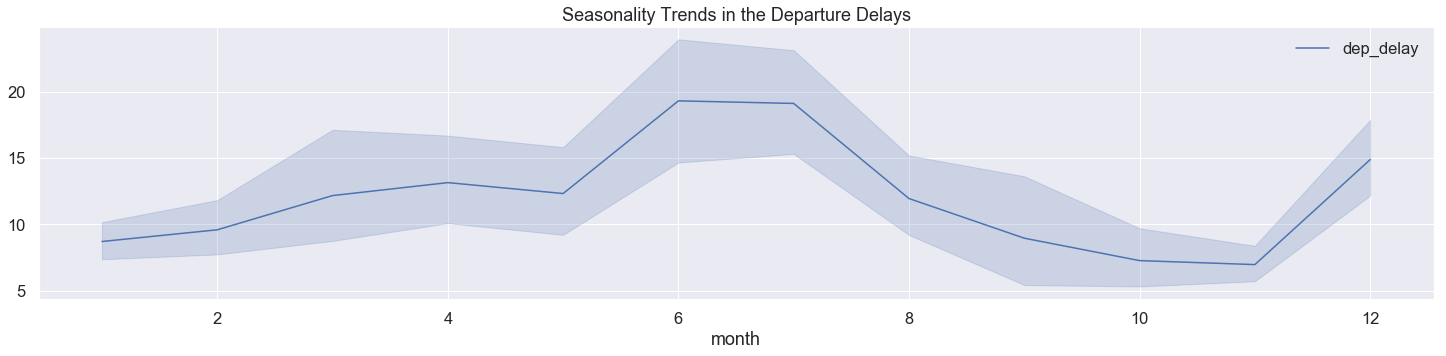

In [32]:
seasonal_flights_df = flights_grouped_df[['dep_delay', 'month']]
seasonal_flights_df.set_index('month', inplace=True)

plt.figure(figsize=(25, 5))
plt.title('Seasonality Trends in the Departure Delays')
sns.lineplot(data=seasonal_flights_df)
plt.show()

This plot shows us that there is a peak in the departure delay during June, July and the delays generally fall down during the winter months September, October, November and increase again in December.

We suspect that the reason behind these peaks is the number of passenger travelling during the summer vacation in June and July and during the Christmas vacation in December.

The conclusion is that none of the weather features are usefull for predicting departure delays. However, we belive that the departure delay is related to the month of the year and when people tend to travel more.

#### f) Is the age of the plane associated with delay? Do OLS, Ridge, Lasso, and Elastic Net

In [33]:
# joining planes and flights
flights_planes_df = pd.merge(flights_df, planes_df, how='left', on=['tailnum']).dropna()
# remove irrelevant variables
flights_planes_df.drop(['type', 'manufacturer', 'model', 'engines', 'seats', 'speed', 'engine'], axis=1)
# create variable to hold the age of the plane
flights_planes_df['age'] = datetime.now().year - flights_planes_df['year_y']

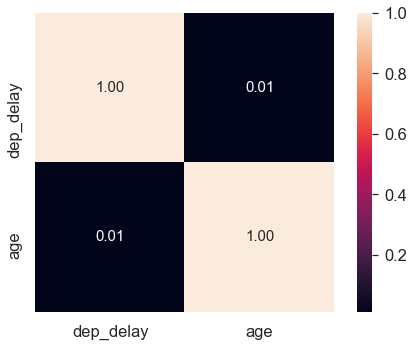

In [34]:
# what does the heatmap suggest:
cols = ['dep_delay', 'age']
cm = np.corrcoef(flights_planes_df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap (cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':15}, yticklabels=cols, xticklabels=cols)
plt.show()

The heatmap suggest that age is scarcely not correlated to the departure delay. Let' see what the pair plot shows:

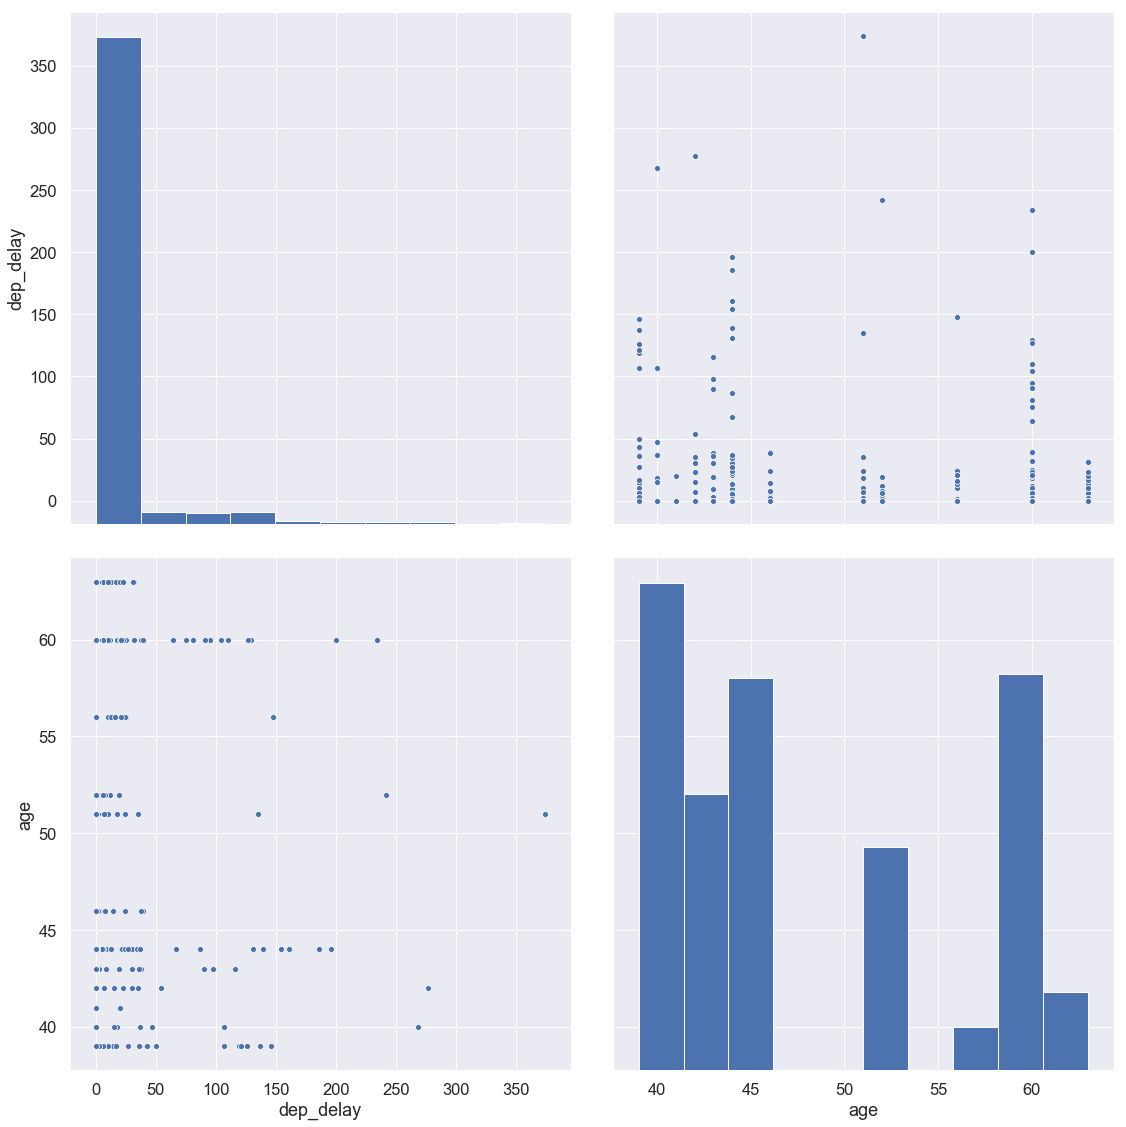

In [35]:
sns.pairplot(flights_planes_df[cols], height=8)
plt.show()

In the above pair plot we observe no indication of a relationship between plane age and departure delay. Let's perform regression modelling on the data set.

In [36]:
X = flights_planes_df[['age']]
y = flights_planes_df['dep_delay']

X_train, X_test, y_train, y_test = train_test_split(X, y ,random_state=42)
lr = LinearRegression().fit(X_train, y_train)
lasso = Lasso().fit(X_train, y_train)
ridge = Ridge().fit(X_train, y_train)
elastic_net = ElasticNet().fit(X_train, y_train)

print ("OLS Training score: {:2f}".format(lr.score(X_train, y_train)))
print ("OLS Test score: {:2f}\n".format(lr.score(X_test, y_test)))

print ("Lasso Training score: {:2f}".format(lasso.score(X_train, y_train)))
print ("Lasso Test score: {:2f}\n".format(lasso.score(X_test, y_test)))

print ("Ridge Training score: {:2f}".format(ridge.score(X_train, y_train)))
print ("Ridge Test score: {:2f}\n".format(ridge.score(X_test, y_test)))

print ("ElasticNet Training score: {:2f}".format(elastic_net.score(X_train, y_train)))
print ("ElasticNet Test score: {:2f}".format(elastic_net.score(X_test, y_test)))

OLS Training score: 0.000123
OLS Test score: 0.000020

Lasso Training score: 0.000113
Lasso Test score: -0.000011

Ridge Training score: 0.000123
Ridge Test score: 0.000020

ElasticNet Training score: 0.000120
ElasticNet Test score: 0.000006


We observe that all models perform really poorly - it appears not to be possiple to predict the departure delay from the plane age.

#### g) Do a principal component analysis of the weather at JFK using the following columns: temp, dewp, humid, wind_dir, wind_speed, precip, visib.
#### How many principal components should be used to capture the variability in the weather data?

In [37]:
# removing unneccesary rows and columns from the weather dataframe
weather_jfk_feaures = ['temp', 'dewp', 'humid', 'wind_dir', 'wind_speed', 'precip', 'visib']
X = weather_df.loc[weather_df.origin == 'JFK'][weather_jfk_feaures].dropna()
X.head()

,temp,dewp,humid,wind_dir,wind_speed,precip,visib
8708,3.3,23.00,54.51,240.0,16.11092,0.0,10.0
8709,3.3,24.08,57.04,250.0,17.26170,0.0,10.0
8710,3.9,24.98,56.77,240.0,19.56326,0.0,10.0
8711,3.9,26.06,59.37,240.0,18.41248,0.0,10.0
8712,3.9,24.98,56.77,260.0,14.96014,0.0,10.0


In [38]:
# Standardize the range of the initial features so that each of them contributes equally to the analysis
X_scaled = preprocessing.StandardScaler().fit_transform(X)
pca = decomposition.PCA()
X_pca = pca.fit_transform(X_scaled)

pca.explained_variance_ratio_

array([3.73802043e-01, 2.08743806e-01, 1.61648445e-01, 1.10137831e-01,
       8.75193656e-02, 5.77932949e-02, 3.55214775e-04])

The explained variance suggests that using 5 PCA components accounts for 94% of the variance. 6 components account for 100%. Therefore we can drop component 6th, 7th, 8th and 9th.

In [39]:
sum(pca.explained_variance_ratio_[:5])

0.9418514902834784

Let's plot the explained variance ratio for each principal component, so we can see that certainly, the first 5 principal components are sufficient to perform analysis on the weather dataset.

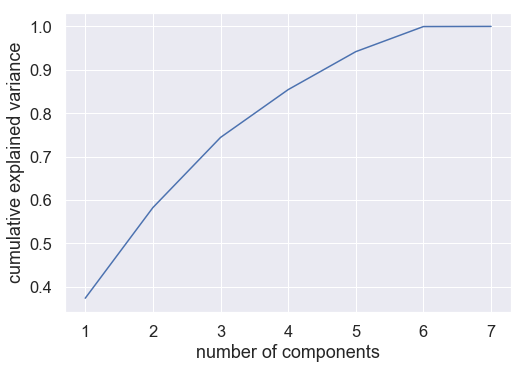

In [40]:
x = list(range(1, 1 + len(pca.explained_variance_ratio_)))
plt.plot(x, np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance') 
plt.show()

As it can be seen in the plot, the dimension of the weather dataset can be reduced to 5 without losing much information.

#### h) Build regression models (OLS, Ridge, Lasso, and Elastic Net) that associates an airports lattitude with weather conditions (temp, dewp, humid, wind_dir, wind_speed, precip, visib). Remove all but the three most significant whether conditions and redo the analysis.

In [42]:
# joining airports and weather
weather_airport_df = pd.merge(weather_df, airports_df, how='left', left_on=['origin'], right_on = ['faa'])
weather_airport_df = weather_airport_df.drop(['origin','time_hour','faa', 'name'], axis=1).dropna()
weather_airport_df.head()
corr = weather_airport_df.corr()
corr.style.background_gradient(cmap='YlOrRd')

,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,lat,lon,alt,tz
year,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
month,nan,1,0.0191321,-0.00415125,0.269162,0.269851,0.0780723,-0.0810482,-0.0839347,-0.0839347,-0.00590647,0.0911433,0.0391946,-4.42664e-05,0.000796806,-0.000198796,nan
day,nan,0.0191321,1,-0.000339442,-0.00494835,-0.0189011,-0.0345227,0.00178084,-0.0121466,-0.0121466,0.0103284,0.0228655,0.0367586,0.00198624,0.00254472,0.0014066,nan
hour,nan,-0.00415125,-0.000339442,1,0.128053,-0.025686,-0.294668,0.0425103,0.124413,0.124413,-0.0128115,-0.0366546,0.0208699,0.00043826,0.00639058,-0.000833219,nan
temp,nan,0.269162,-0.00494835,0.128053,1,0.901694,0.107354,-0.129203,-0.109271,-0.109271,-0.0294295,-0.253124,0.0430503,0.0304375,-0.0122791,0.0316142,nan
dewp,nan,0.269851,-0.0189011,-0.025686,0.901694,1,0.519349,-0.246228,-0.181697,-0.181697,0.0421385,-0.288024,-0.127856,-0.0313371,-0.00215463,-0.0296458,nan
humid,nan,0.0780723,-0.0345227,-0.294668,0.107354,0.519349,1,-0.32503,-0.206031,-0.206031,0.186541,-0.180095,-0.452443,-0.147839,0.0154925,-0.144894,nan
wind_dir,nan,-0.0810482,0.00178084,0.0425103,-0.129203,-0.246228,-0.32503,1,0.254586,0.254586,-0.0780589,-0.198947,0.187446,-0.00647024,0.0320246,-0.012491,nan
wind_speed,nan,-0.0839347,-0.0121466,0.124413,-0.109271,-0.181697,-0.206031,0.254586,1,1,0.0299997,-0.132706,0.0489565,-0.0267787,0.0822204,-0.041825,nan
wind_gust,nan,-0.0839347,-0.0121466,0.124413,-0.109271,-0.181697,-0.206031,0.254586,1,1,0.0299997,-0.132706,0.0489565,-0.0267787,0.0822204,-0.041825,nan


In [43]:
X = weather_airport_df[['temp', 'dewp', 'humid', 'wind_dir', 'wind_speed','precip','visib']]
y = weather_airport_df['lat']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)
lasso = Lasso().fit(X_train, y_train)
ridge = Ridge().fit(X_train, y_train)
elastic_net = ElasticNet().fit(X_train, y_train)

print ("OLS Training score: {:2f}".format(lr.score(X_train, y_train)))
print ("OLS Test score: {:2f}\n".format(lr.score(X_test, y_test)))

print ("Lasso Training score: {:2f}".format(lasso.score(X_train, y_train)))
print ("Lasso Test score: {:2f}\n".format(lasso.score(X_test, y_test)))

print ("Ridge Training score: {:2f}".format(ridge.score(X_train, y_train)))
print ("Ridge Test score: {:2f}\n".format(ridge.score(X_test, y_test)))

print ("ElasticNet Training score: {:2f}".format(elastic_net.score(X_train, y_train)))
print ("ElasticNet Test score: {:2f}".format(elastic_net.score(X_test, y_test)))

OLS Training score: 0.041278
OLS Test score: 0.030807

Lasso Training score: 0.000000
Lasso Test score: -0.000201

Ridge Training score: 0.041271
Ridge Test score: 0.030822

ElasticNet Training score: 0.000000
ElasticNet Test score: -0.000201


We observe that all models perform very poorly, but still OLS and Ridge is relatively better than Lasso, and ElasticNet. Let's try with only the three weather conditions that in (e) we found to be the most important (temp, dewp and precip):

In [44]:
X = weather_airport_df[['temp','dewp','precip']]
y = weather_airport_df['lat']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)
lasso = Lasso().fit(X_train, y_train)
ridge = Ridge().fit(X_train, y_train)
elastic_net = ElasticNet().fit(X_train, y_train)

print ("OLS Training score: {:2f}".format(lr.score(X_train, y_train)))
print ("OLS Test score: {:2f}\n".format(lr.score(X_test, y_test)))

print ("Lasso Training score: {:2f}".format(lasso.score(X_train, y_train)))
print ("Lasso Test score: {:2f}\n".format(lasso.score(X_test, y_test)))

print ("Ridge Training score: {:2f}".format(ridge.score(X_train, y_train)))
print ("Ridge Test score: {:2f}\n".format(ridge.score(X_test, y_test)))

print ("ElasticNet Training score: {:2f}".format(elastic_net.score(X_train, y_train)))
print ("ElasticNet Test score: {:2f}".format(elastic_net.score(X_test, y_test)))

OLS Training score: 0.021139
OLS Test score: 0.013743

Lasso Training score: 0.000000
Lasso Test score: -0.000201

Ridge Training score: 0.021137
Ridge Test score: 0.013760

ElasticNet Training score: 0.000000
ElasticNet Test score: -0.000201


We observe again that all perform poorly, again OLS and Ridge perform better than Lasso and ElasticNet. 
However the performance of OLS/Ridge is only about half of the previous scores using all weather features. We expected it to more closely the same.

#### i) On a map, plot the airports that have flights to them where the points that represent airports are relative in size to the average departure delay. You can see an example in "airports.png".

In [42]:
# joining airports and flights
flights_map_df = flights_df.groupby(['dest'], as_index=False)['dep_delay'].mean()
flights_airports_df = pd.merge(flights_map_df, airports_df, how='left', left_on=['dest'], right_on=['faa'])
flights_airports_df = flights_airports_df.drop(['dst', 'faa'], axis=1).dropna()
flights_airports_df.head()

,dest,dep_delay,name,lat,lon,alt,tz,tzone
0,ANC,13.125000,Ted Stevens Anchorage Intl,61.174361,-149.996361,152.0,-9.0,America/Anchorage
1,ATL,12.910745,Hartsfield Jackson Atlanta Intl,33.636719,-84.428067,1026.0,-5.0,America/New_York
2,AUS,16.029112,Austin Bergstrom Intl,30.194528,-97.669889,542.0,-6.0,America/Chicago
3,BDL,28.000000,Bradley Intl,41.938889,-72.683222,173.0,-5.0,America/New_York
4,BNA,0.000000,Nashville Intl,36.124472,-86.678194,599.0,-6.0,America/Chicago


Plotting the dep_delay data over the airports.png map

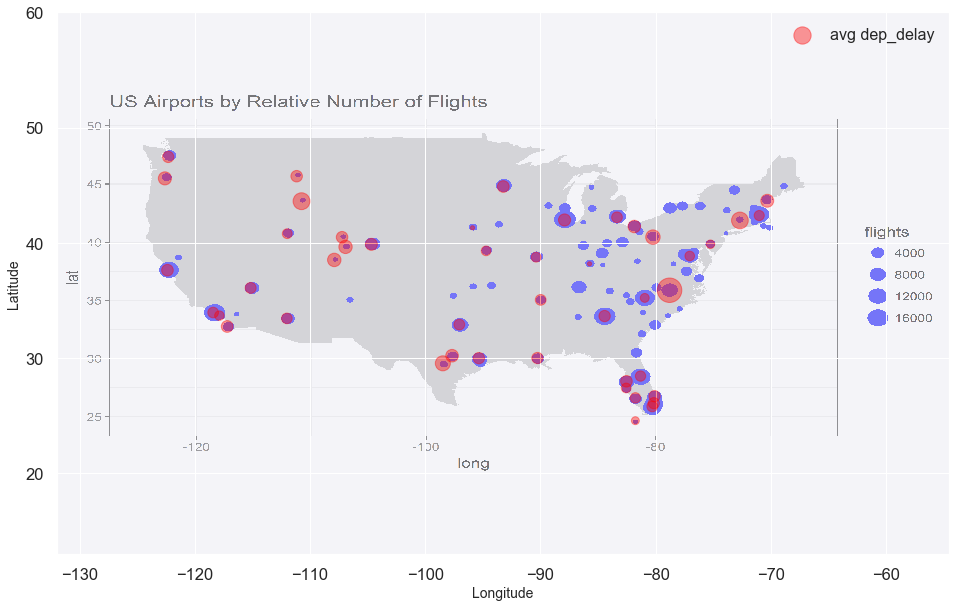

In [43]:
airports_img = mpimg.imread('airports.png')
ax = flights_airports_df.plot(kind="scatter", x="lon", y="lat", figsize=(16,15),
                       s=flights_airports_df['dep_delay']*10, label="avg dep_delay",
                       c="red", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4)

plt.imshow(airports_img, extent=[-132, -54.5, 13, 60], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend(fontsize=16)
plt.show()

We observe in the above map that the red dots show the avg dep_delay and the blue show the number of flights. Some airports seem to be more efficient than others - fx. Atlanta, Chicago, Los Angeles

####  j) These questions require no code.

**- Suppose you are using Ridge Regression and you notice that the training error and the validation error are almost equal and fairly high. Would you say that the model suffers from high bias or high variance?**

The model suffers from high bias. Because the training error and the validation error are high, the model is underfitting and it cannot capture the curve in the relationship.

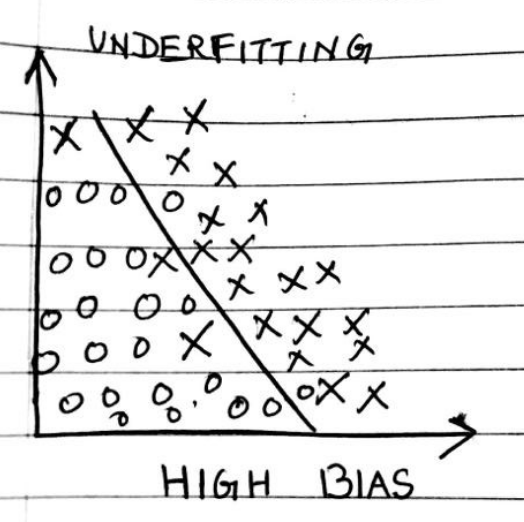

#### Should you increase the regularization hyperparameter or reduce it?
The L2 regularization alpha parameter should be reduced in order to decrease high bias.

####       - Why would you want to use:
- **Ridge Regression instead of plain Linear Regression (i.e. without any regularization)?** Ridge can be used over OLS, because it is a more restricted model that is less likely to overfit, and OLS' high variance can cause bad predictions, which can be solved by shrinking the coefficients, using L2 regularization.
- **Lasso instead of Ridge Regression?** We can use Lasso instead of Ridge if the dataset has a lot of features and we expect only a few of them to be important. The L1 regularization used in Lasso, allows for some features to be ignored by setting their coefficients to exactly 0, which makes the model easier to understand. This makes Lasso different to Ridge, since it has the ability to perform feature selection in a linear model.
- **Elastic Net instead of Lasso?** Elastic Net could be preferred in cases where we want to combine L1 and L2 regularizations from Lasso and Ridge.